In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Generating data

In [72]:
sample_size = int(1e3);
x = np.linspace(0,1, num=sample_size);
data = np.sin(2*np.pi*x) + np.random.normal(size=sample_size,scale=0.35);
#data = np.sin(2*np.pi*x) + (np.e**x)*1.7 + np.random.normal(size=sample_size,scale=0.35);

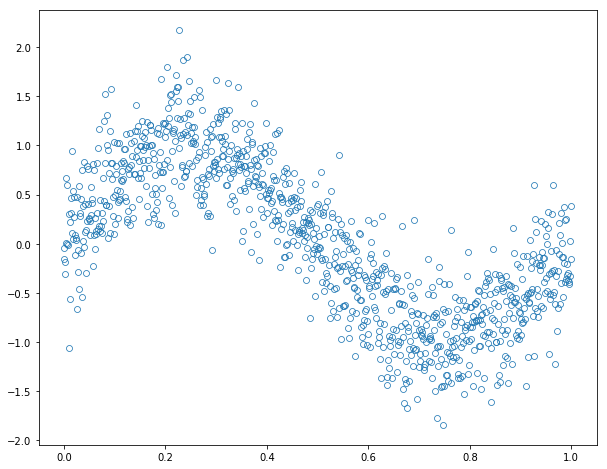

In [73]:
plt.figure(figsize=(10,8))
plt.plot(x,data,'o',markerfacecolor='none',markeredgewidth=0.75);

#### Defining the function

Now, we'll see the problem of $ y(\boldsymbol{x},\boldsymbol{w}) = w_0 + w_1 x^1 + ... + w_D x^D $ and make some changes. Let's choose some arbitrary function class $ \phi(x) $ and then, our previous relation becomes $ y(\boldsymbol{x},\boldsymbol{\phi}) = w_0 + w_1 \phi_1 + ... + w_D \phi_D $, such that $ \phi_i $ are apparently linearly independent. So, in this example we'll choose the function $$ \phi_i = \exp \left( -\frac{(x-\mu_i)^2}{s^2} \right) $$